In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/FerryWahyudi/DataGojekReview/main/GojekAppReview_1.csv"
df = pd.read_csv(url)


# Download

In [2]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


In [3]:
!pip install nlp-id indoNLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.3/484.3 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 12.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=d207a263c5f8bde0c14769562b5cb08f6a72b8d670ad77ed240313b201442a72
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.32.4
    Uninstalling huggingface-hub-0.32.4:
      Successfully uninstalled huggingface-hub-0.32.4


# Import

In [4]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nlp_id.lemmatizer import Lemmatizer
from indoNLP.preprocessing import replace_slang, replace_word_elongation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

from pprint import pprint
import joblib

# Untuk token dan stopwords pipeline TF-IDF
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [5]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Load Dataset

In [6]:
# Ganti path lokal dengan URL raw dari GitHub
url = "https://raw.githubusercontent.com/FerryWahyudi/DataGojekReview/main/GojekAppReview_1.csv"
df = pd.read_csv(url)

# Menampilkan dataframe
df


,userName,content,score,at,appVersion
0,Yuga Edit,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3
1,ff burik,Lambat sekali sekarang ini bosssku apk gojek g...,3,2021-11-30 15:40:38,4.9.3
2,Anisa Suci Rahmayuliani,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,2021-11-29 22:58:12,4.9.3
3,naoki yakuza,Baru download gojek dan hape baru trus ditop u...,1,2022-09-03 15:21:17,4.9.3
4,Trio Sugianto,Mantap,5,2022-01-15 10:05:27,4.9.3
...,...,...,...,...,...
224997,Sad Gamer,Gofood Biaya lain2ya gak ngotak mending hujan2...,1,2023-02-15 09:37:58,4.0.0
224998,fadhil fadil,Yok lah,5,2021-12-11 12:28:20,4.0.0
224999,g sugiarto,Sempurna,5,2022-03-14 01:45:39,4.0.0
225000,J i H A D 'B E,GOJEK LAMA LAMA GAK JELAS LAGI PESEN MASA MAP...,1,2021-12-24 08:48:51,4.0.0


### Drop userName (Opsional)





In [7]:
df = df.drop(columns=['userName']);
df

,content,score,at,appVersion
0,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3
1,Lambat sekali sekarang ini bosssku apk gojek g...,3,2021-11-30 15:40:38,4.9.3
2,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,2021-11-29 22:58:12,4.9.3
3,Baru download gojek dan hape baru trus ditop u...,1,2022-09-03 15:21:17,4.9.3
4,Mantap,5,2022-01-15 10:05:27,4.9.3
...,...,...,...,...
224997,Gofood Biaya lain2ya gak ngotak mending hujan2...,1,2023-02-15 09:37:58,4.0.0
224998,Yok lah,5,2021-12-11 12:28:20,4.0.0
224999,Sempurna,5,2022-03-14 01:45:39,4.0.0
225000,GOJEK LAMA LAMA GAK JELAS LAGI PESEN MASA MAP...,1,2021-12-24 08:48:51,4.0.0


# 1. Pengecekkan Dataset

## Info dataset

In [8]:
df['score'].value_counts()

,count
score,
5,147055
1,45229
4,14316
3,9460
2,8942


In [9]:
print(len(df))

225002


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225002 entries, 0 to 225001
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   content     225000 non-null  object
 1   score       225002 non-null  int64 
 2   at          225002 non-null  object
 3   appVersion  225002 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.9+ MB


## Kolom Kosong

In [11]:
df.isna().sum()

,0
content,2
score,0
at,0
appVersion,0


### Drop 2 baris

In [12]:
df.dropna(subset=['content'], inplace=True)

In [13]:
df.isna().sum()

,0
content,0
score,0
at,0
appVersion,0


In [14]:
print(len(df))

225000


## 2. Pemberian label sentimen

In [15]:
def analisis_sentimen(score):
    if score >= 4:
        return 'positive'
    elif score == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['score'].apply(analisis_sentimen)
df.head()


,content,score,at,appVersion,sentiment
0,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3,negative
1,Lambat sekali sekarang ini bosssku apk gojek g...,3,2021-11-30 15:40:38,4.9.3,neutral
2,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,2021-11-29 22:58:12,4.9.3,positive
3,Baru download gojek dan hape baru trus ditop u...,1,2022-09-03 15:21:17,4.9.3,negative
4,Mantap,5,2022-01-15 10:05:27,4.9.3,positive


## 3. Pembersihan teks (content)

In [16]:
def clean_text(text):
    # Cek jika input adalah string
    if not isinstance(text, str):
        return "" # Return string kosong untuk non-string

    text = text.lower()
    text = re.sub(r"http\S+|www.\S+", "", text)  # hapus URL
    text = re.sub(r'[^\w\s]', '', text)  # hapus tanda baca
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # hapus emoji/karakter non-ASCII
    text = re.sub(r'\s+', ' ', text).strip() # hapus spasi ganda
    return text

df['content'] = df['content'].apply(clean_text)
df

,content,score,at,appVersion,sentiment
0,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3,negative
1,lambat sekali sekarang ini bosssku apk gojek g...,3,2021-11-30 15:40:38,4.9.3,neutral
2,kenapa sih dari kemarin sy buka aplikasi gojek...,4,2021-11-29 22:58:12,4.9.3,positive
3,baru download gojek dan hape baru trus ditop u...,1,2022-09-03 15:21:17,4.9.3,negative
4,mantap,5,2022-01-15 10:05:27,4.9.3,positive
...,...,...,...,...,...
224997,gofood biaya lain2ya gak ngotak mending hujan2...,1,2023-02-15 09:37:58,4.0.0,negative
224998,yok lah,5,2021-12-11 12:28:20,4.0.0,positive
224999,sempurna,5,2022-03-14 01:45:39,4.0.0,positive
225000,gojek lama lama gak jelas lagi pesen masa maps...,1,2021-12-24 08:48:51,4.0.0,negative


In [17]:
print(len(df))

225000


## 4. Normalisasi kata tidak baku (Otomatis pake IndoNLP)

In [18]:
df['content'] = df['content'].apply(replace_slang)

In [ ]:
df

,content,score,at,appVersion,sentiment
0,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3,negative
1,lambat sekali sekarang ini bosssku apk gojek e...,3,2021-11-30 15:40:38,4.9.3,neutral
2,kenapa sih dari kemarin saya buka aplikasi goj...,4,2021-11-29 22:58:12,4.9.3,positive
3,baru download gojek dan hape baru terus ditop ...,1,2022-09-03 15:21:17,4.9.3,negative
4,mantap,5,2022-01-15 10:05:27,4.9.3,positive
...,...,...,...,...,...
224997,gofood biaya lain2ya enggak ngotak mending huj...,1,2023-02-15 09:37:58,4.0.0,negative
224998,yuk lah,5,2021-12-11 12:28:20,4.0.0,positive
224999,sempurna,5,2022-03-14 01:45:39,4.0.0,positive
225000,gojek lama lama enggak jelas lagi pesan masa m...,1,2021-12-24 08:48:51,4.0.0,negative


## 5. Tokenisasi dan Penghapusan Stopword

In [19]:
def tokenize_text(text):
    # menghapus spasi ekstra
    text = text.strip()
    tokens = nltk.word_tokenize(text)
    # menghapus angak dan simbol pada token
    tokens = [token for token in tokens if token.isalpha()]
    return tokens

def remove_stopword(tokens):
    # menghapus stopword
    stopwords = nltk.corpus.stopwords.words('indonesian')
    tokens = [token for token in tokens if token not in stopwords]
    return tokens

df['tokens'] = df['content'].apply(tokenize_text)
df['tokens_without_stopword'] = df['tokens'].apply(remove_stopword)

In [ ]:
df

,content,score,at,appVersion,sentiment,tokens,tokens_without_stopword
0,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3,negative,"[akun, gopay, saya, di, blok]","[akun, gopay, blok]"
1,lambat sekali sekarang ini bosssku apk gojek e...,3,2021-11-30 15:40:38,4.9.3,neutral,"[lambat, sekali, sekarang, ini, bosssku, apk, ...","[lambat, bosssku, apk, gojek, kayak]"
2,kenapa sih dari kemarin saya buka aplikasi goj...,4,2021-11-29 22:58:12,4.9.3,positive,"[kenapa, sih, dari, kemarin, saya, buka, aplik...","[sih, kemarin, buka, aplikasi, gojek, kasih, b..."
3,baru download gojek dan hape baru terus ditop ...,1,2022-09-03 15:21:17,4.9.3,negative,"[baru, download, gojek, dan, hape, baru, terus...","[download, gojek, hape, ditop, lu, gopay, tran..."
4,mantap,5,2022-01-15 10:05:27,4.9.3,positive,[mantap],[mantap]
...,...,...,...,...,...,...,...
224997,gofood biaya lain2ya enggak ngotak mending huj...,1,2023-02-15 09:37:58,4.0.0,negative,"[gofood, biaya, enggak, ngotak, mending, beli,...","[gofood, biaya, ngotak, mending, beli, makan, ..."
224998,yuk lah,5,2021-12-11 12:28:20,4.0.0,positive,"[yuk, lah]",[yuk]
224999,sempurna,5,2022-03-14 01:45:39,4.0.0,positive,[sempurna],[sempurna]
225000,gojek lama lama enggak jelas lagi pesan masa m...,1,2021-12-24 08:48:51,4.0.0,negative,"[gojek, lama, lama, enggak, jelas, lagi, pesan...","[gojek, pesan, mapsnya, hilang, layar, putih, ..."


In [20]:
df['content_processed'] = df['tokens_without_stopword'].apply(" ".join)

In [ ]:
df

,content,score,at,appVersion,sentiment,tokens,tokens_without_stopword,content_processed
0,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3,negative,"[akun, gopay, saya, di, blok]","[akun, gopay, blok]",akun gopay blok
1,lambat sekali sekarang ini bosssku apk gojek e...,3,2021-11-30 15:40:38,4.9.3,neutral,"[lambat, sekali, sekarang, ini, bosssku, apk, ...","[lambat, bosssku, apk, gojek, kayak]",lambat bosssku apk gojek kayak
2,kenapa sih dari kemarin saya buka aplikasi goj...,4,2021-11-29 22:58:12,4.9.3,positive,"[kenapa, sih, dari, kemarin, saya, buka, aplik...","[sih, kemarin, buka, aplikasi, gojek, kasih, b...",sih kemarin buka aplikasi gojek kasih bintang ...
3,baru download gojek dan hape baru terus ditop ...,1,2022-09-03 15:21:17,4.9.3,negative,"[baru, download, gojek, dan, hape, baru, terus...","[download, gojek, hape, ditop, lu, gopay, tran...",download gojek hape ditop lu gopay transaksi d...
4,mantap,5,2022-01-15 10:05:27,4.9.3,positive,[mantap],[mantap],mantap
...,...,...,...,...,...,...,...,...
224997,gofood biaya lain2ya enggak ngotak mending huj...,1,2023-02-15 09:37:58,4.0.0,negative,"[gofood, biaya, enggak, ngotak, mending, beli,...","[gofood, biaya, ngotak, mending, beli, makan, ...",gofood biaya ngotak mending beli makan deh
224998,yuk lah,5,2021-12-11 12:28:20,4.0.0,positive,"[yuk, lah]",[yuk],yuk
224999,sempurna,5,2022-03-14 01:45:39,4.0.0,positive,[sempurna],[sempurna],sempurna
225000,gojek lama lama enggak jelas lagi pesan masa m...,1,2021-12-24 08:48:51,4.0.0,negative,"[gojek, lama, lama, enggak, jelas, lagi, pesan...","[gojek, pesan, mapsnya, hilang, layar, putih, ...",gojek pesan mapsnya hilang layar putih nama pe...


# 6. Stemming atau Lemmatization (pilih satu)

## Stemming (menggunakan Sastrawi)




In [ ]:
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

df['content_processed'] = df['content_processed'].apply(stemmer.stem)

KeyboardInterrupt: 

## Lemmatization (menggunakan NLP-ID)

In [21]:
lemmatizer = Lemmatizer()
df['content_processed'] = df['content_processed'].apply(lemmatizer.lemmatize)

# Cek ulang dataset

In [22]:
df

,content,score,at,appVersion,sentiment,tokens,tokens_without_stopword,content_processed
0,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3,negative,"[akun, gopay, saya, di, blok]","[akun, gopay, blok]",akun gopay blok
1,lambat sekali sekarang ini bosssku apk gojek e...,3,2021-11-30 15:40:38,4.9.3,neutral,"[lambat, sekali, sekarang, ini, bosssku, apk, ...","[lambat, bosssku, apk, gojek, kayak]",lambat bosssku apk gojek kayak
2,kenapa sih dari kemarin saya buka aplikasi goj...,4,2021-11-29 22:58:12,4.9.3,positive,"[kenapa, sih, dari, kemarin, saya, buka, aplik...","[sih, kemarin, buka, aplikasi, gojek, kasih, b...",sih kemarin buka aplikasi gojek kasih bintang ...
3,baru download gojek dan hape baru terus ditop ...,1,2022-09-03 15:21:17,4.9.3,negative,"[baru, download, gojek, dan, hape, baru, terus...","[download, gojek, hape, ditop, lu, gopay, tran...",download gojek hape top lu gopay transaksi dia...
4,mantap,5,2022-01-15 10:05:27,4.9.3,positive,[mantap],[mantap],mantap
...,...,...,...,...,...,...,...,...
224997,gofood biaya lain2ya enggak ngotak mending huj...,1,2023-02-15 09:37:58,4.0.0,negative,"[gofood, biaya, enggak, ngotak, mending, beli,...","[gofood, biaya, ngotak, mending, beli, makan, ...",gofood biaya ngotak mending beli makan deh
224998,yuk lah,5,2021-12-11 12:28:20,4.0.0,positive,"[yuk, lah]",[yuk],yuk
224999,sempurna,5,2022-03-14 01:45:39,4.0.0,positive,[sempurna],[sempurna],sempurna
225000,gojek lama lama enggak jelas lagi pesan masa m...,1,2021-12-24 08:48:51,4.0.0,negative,"[gojek, lama, lama, enggak, jelas, lagi, pesan...","[gojek, pesan, mapsnya, hilang, layar, putih, ...",gojek pesan mapsnya hilang layar putih nama ke...


## Cek nilai kosong

In [23]:
df.isna().sum()

,0
content,0
score,0
at,0
appVersion,0
sentiment,0
tokens,0
tokens_without_stopword,0
content_processed,0


## Mengecek baris dengan string atau spasi kososng di semua kolom

In [24]:
for col in df.columns:
    count_spaces = df[col].apply(lambda x: isinstance(x, str) and x.strip() == '').sum()
    print(f"Kolom '{col}' ada {count_spaces} baris isinya cuma spasi atau kosong")

Kolom 'content' ada 78 baris isinya cuma spasi atau kosong
Kolom 'score' ada 0 baris isinya cuma spasi atau kosong
Kolom 'at' ada 0 baris isinya cuma spasi atau kosong
Kolom 'appVersion' ada 0 baris isinya cuma spasi atau kosong
Kolom 'sentiment' ada 0 baris isinya cuma spasi atau kosong
Kolom 'tokens' ada 0 baris isinya cuma spasi atau kosong
Kolom 'tokens_without_stopword' ada 0 baris isinya cuma spasi atau kosong
Kolom 'content_processed' ada 4386 baris isinya cuma spasi atau kosong


## Menghapus baris dengan string atau spasi kosong pada kolom "content" dan "content_processed"

In [25]:
df = df[~df['content'].apply(lambda x: isinstance(x, str) and x.strip() == '')].copy()

In [26]:
df = df[~df['content_processed'].apply(lambda x: isinstance(x, str) and x.strip() == '')].copy()

## Mengecek ulang df

In [27]:
df

,content,score,at,appVersion,sentiment,tokens,tokens_without_stopword,content_processed
0,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3,negative,"[akun, gopay, saya, di, blok]","[akun, gopay, blok]",akun gopay blok
1,lambat sekali sekarang ini bosssku apk gojek e...,3,2021-11-30 15:40:38,4.9.3,neutral,"[lambat, sekali, sekarang, ini, bosssku, apk, ...","[lambat, bosssku, apk, gojek, kayak]",lambat bosssku apk gojek kayak
2,kenapa sih dari kemarin saya buka aplikasi goj...,4,2021-11-29 22:58:12,4.9.3,positive,"[kenapa, sih, dari, kemarin, saya, buka, aplik...","[sih, kemarin, buka, aplikasi, gojek, kasih, b...",sih kemarin buka aplikasi gojek kasih bintang ...
3,baru download gojek dan hape baru terus ditop ...,1,2022-09-03 15:21:17,4.9.3,negative,"[baru, download, gojek, dan, hape, baru, terus...","[download, gojek, hape, ditop, lu, gopay, tran...",download gojek hape top lu gopay transaksi dia...
4,mantap,5,2022-01-15 10:05:27,4.9.3,positive,[mantap],[mantap],mantap
...,...,...,...,...,...,...,...,...
224997,gofood biaya lain2ya enggak ngotak mending huj...,1,2023-02-15 09:37:58,4.0.0,negative,"[gofood, biaya, enggak, ngotak, mending, beli,...","[gofood, biaya, ngotak, mending, beli, makan, ...",gofood biaya ngotak mending beli makan deh
224998,yuk lah,5,2021-12-11 12:28:20,4.0.0,positive,"[yuk, lah]",[yuk],yuk
224999,sempurna,5,2022-03-14 01:45:39,4.0.0,positive,[sempurna],[sempurna],sempurna
225000,gojek lama lama enggak jelas lagi pesan masa m...,1,2021-12-24 08:48:51,4.0.0,negative,"[gojek, lama, lama, enggak, jelas, lagi, pesan...","[gojek, pesan, mapsnya, hilang, layar, putih, ...",gojek pesan mapsnya hilang layar putih nama ke...


## Mengecek ulang baris dengan string atau spasi kososng di semua kolom

In [28]:
for col in df.columns:
    count_spaces = df[col].apply(lambda x: isinstance(x, str) and x.strip() == '').sum()
    print(f"Kolom '{col}' ada {count_spaces} baris isinya cuma spasi atau kosong")

Kolom 'content' ada 0 baris isinya cuma spasi atau kosong
Kolom 'score' ada 0 baris isinya cuma spasi atau kosong
Kolom 'at' ada 0 baris isinya cuma spasi atau kosong
Kolom 'appVersion' ada 0 baris isinya cuma spasi atau kosong
Kolom 'sentiment' ada 0 baris isinya cuma spasi atau kosong
Kolom 'tokens' ada 0 baris isinya cuma spasi atau kosong
Kolom 'tokens_without_stopword' ada 0 baris isinya cuma spasi atau kosong
Kolom 'content_processed' ada 0 baris isinya cuma spasi atau kosong


## Mengecek isi kolom "content" dengan isi "null"

In [29]:
ceknull = df[(df['content'] == 'null')]
ceknull

,content,score,at,appVersion,sentiment,tokens,tokens_without_stopword,content_processed
118105,null,5,2022-06-26 06:13:39,4.45.1,positive,[null],[null],null


## Menghapus baris yang memiliki isi kata "null" dalam kolom "content"

In [31]:
df = df[df['content'] != 'null']

In [30]:
df

,content,score,at,appVersion,sentiment,tokens,tokens_without_stopword,content_processed
0,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3,negative,"[akun, gopay, saya, di, blok]","[akun, gopay, blok]",akun gopay blok
1,lambat sekali sekarang ini bosssku apk gojek e...,3,2021-11-30 15:40:38,4.9.3,neutral,"[lambat, sekali, sekarang, ini, bosssku, apk, ...","[lambat, bosssku, apk, gojek, kayak]",lambat bosssku apk gojek kayak
2,kenapa sih dari kemarin saya buka aplikasi goj...,4,2021-11-29 22:58:12,4.9.3,positive,"[kenapa, sih, dari, kemarin, saya, buka, aplik...","[sih, kemarin, buka, aplikasi, gojek, kasih, b...",sih kemarin buka aplikasi gojek kasih bintang ...
3,baru download gojek dan hape baru terus ditop ...,1,2022-09-03 15:21:17,4.9.3,negative,"[baru, download, gojek, dan, hape, baru, terus...","[download, gojek, hape, ditop, lu, gopay, tran...",download gojek hape top lu gopay transaksi dia...
4,mantap,5,2022-01-15 10:05:27,4.9.3,positive,[mantap],[mantap],mantap
...,...,...,...,...,...,...,...,...
224997,gofood biaya lain2ya enggak ngotak mending huj...,1,2023-02-15 09:37:58,4.0.0,negative,"[gofood, biaya, enggak, ngotak, mending, beli,...","[gofood, biaya, ngotak, mending, beli, makan, ...",gofood biaya ngotak mending beli makan deh
224998,yuk lah,5,2021-12-11 12:28:20,4.0.0,positive,"[yuk, lah]",[yuk],yuk
224999,sempurna,5,2022-03-14 01:45:39,4.0.0,positive,[sempurna],[sempurna],sempurna
225000,gojek lama lama enggak jelas lagi pesan masa m...,1,2021-12-24 08:48:51,4.0.0,negative,"[gojek, lama, lama, enggak, jelas, lagi, pesan...","[gojek, pesan, mapsnya, hilang, layar, putih, ...",gojek pesan mapsnya hilang layar putih nama ke...


In [32]:
ceknull = df[(df['content'] == 'null')]
ceknull

,content,score,at,appVersion,sentiment,tokens,tokens_without_stopword,content_processed


# Cloud Words

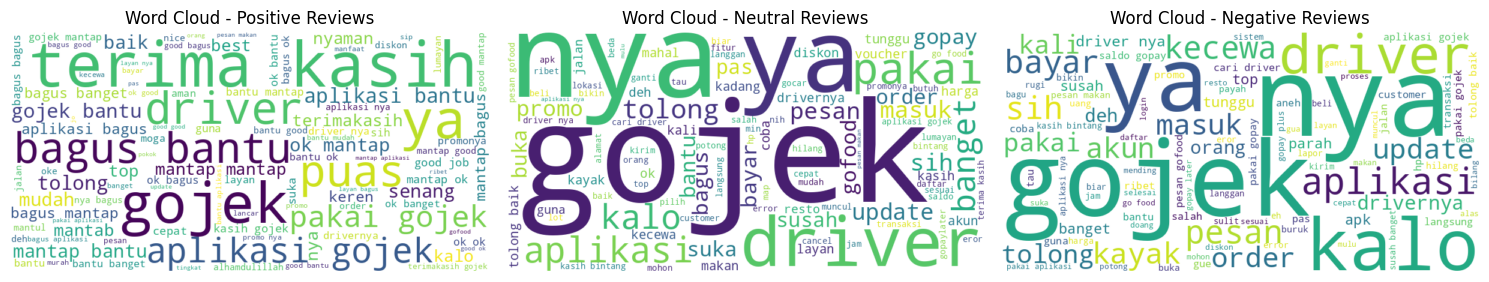

In [33]:
    plt.figure(figsize=(15, 12))

    # Change sentiment labels to match your DataFrame values ('positive', 'neutral', 'negative')
    for i, sentiment in enumerate(['positive', 'neutral', 'negative']):
        plt.subplot(1, 3, i+1)

        # Combine all processed content for the sentiment
        # Use the 'content_processed' column which contains either stemmed or lemmatized text
        text = ' '.join(df[df['sentiment'] == sentiment]['content_processed'].dropna())

        if text:
            wordcloud = WordCloud(width=800, height=400, background_color='white',
                                  max_words=100, contour_width=3, contour_color='steelblue').generate(text)
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.title(f'Word Cloud - {sentiment.capitalize()} Reviews')
            plt.axis('off')
        else:
             # Handle cases where there is no text for a sentiment category
             print(f"No text available for '{sentiment}' sentiment to generate word cloud.")


    plt.tight_layout()
    plt.show();

# Output File

### CSV

In [35]:
output_filename = "Cleaned_GojekAppReview1_baru.csv"
df.to_csv(output_filename, index=False)

# Pemodelan Tradisional

## Model SVM

In [ ]:
# Ambil fitur dan label
X = df['content_processed']
y = df['sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),
    ('svm', SVC(kernel='linear', random_state=42, class_weight='balanced'))
])

# Latih model
svm_pipeline.fit(X_train, y_train)

# Prediksi
y_pred = svm_pipeline.predict(X_test)

              precision  recall  f1-score  support
negative           0.75    0.70      0.72  10780.0
neutral            0.14    0.44      0.21   1859.0
positive           0.97    0.86      0.91  31484.0
accuracy           0.80    0.80      0.80      0.8
macro avg          0.62    0.67      0.61  44123.0
weighted avg       0.88    0.80      0.83  44123.0


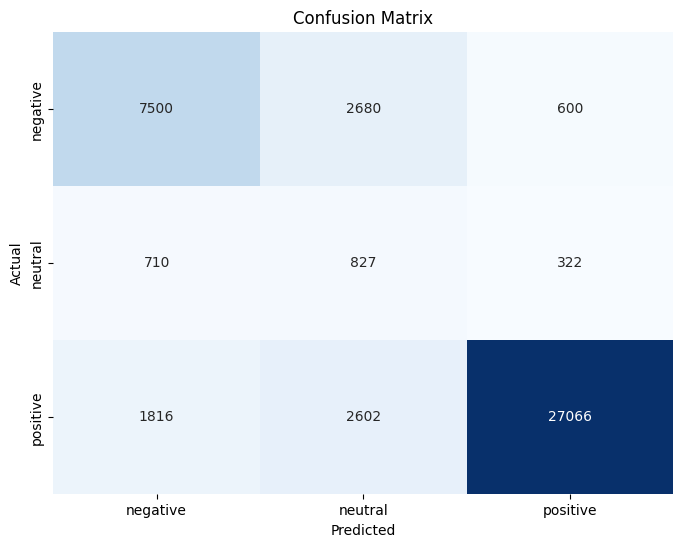

In [ ]:
# Define the target labels
labels = ['negative', 'neutral', 'positive']

# === Hitung Classification Report ===
# Use y_test (actual labels) and y_pred (predicted labels)
report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()


# Classification Report
print(report_df.round(2))

# Confusion Matrix
# Use y_test (actual labels) and y_pred (predicted labels)
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels) # Add labels to ensure correct order
conf_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

### Fungsi untuk pre processing kalimat yang baru di input

In [ ]:
# Inisialisasi lemmatizer
lemmatizer = Lemmatizer()

# Fungsi tokenisasi
def tokenize_text(text):
    text = text.strip()
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha()]
    return tokens

# Fungsi menghapus stopword
def remove_stopword(tokens):
    stop_words = set(stopwords.words('indonesian'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    return tokens

# Fungsi lemmatize token
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

### Percobaan klasifikasi kalimat

In [ ]:
# Kalimat uji mentah
kalimat_uji = ["saya kecewa karena driver nya jelek sekali"]

# Preprocessing: tokenize → stopword removal → lemmatize
tokens = tokenize_text(kalimat_uji[0])
tokens_clean = remove_stopword(tokens)
tokens_lemmatized = lemmatize_tokens(tokens_clean)

# Gabungkan kembali menjadi string
kalimat_bersih = " ".join(tokens_lemmatized)

# Prediksi
prediksi = svm_pipeline.predict([kalimat_bersih])
print(f"Hasil prediksi: {prediksi[0]}")

Hasil prediksi: negative


In [ ]:
# Kalimat uji mentah
kalimat_uji = ["saya senang karena driver nya baik sekali"]

# Preprocessing: tokenize → stopword removal → lemmatize
tokens = tokenize_text(kalimat_uji[0])
tokens_clean = remove_stopword(tokens)
tokens_lemmatized = lemmatize_tokens(tokens_clean)

# Gabungkan kembali menjadi string
kalimat_bersih = " ".join(tokens_lemmatized)

# Prediksi
prediksi = svm_pipeline.predict([kalimat_bersih])
print(f"Hasil prediksi: {prediksi[0]}")

Hasil prediksi: positive


### Save Model SVM

In [ ]:
# (Opsional) Simpan model
joblib.dump(svm_pipeline, 'svm_tfidf_model_customtokenizer.pkl')

['svm_tfidf_model_customtokenizer.pkl']

## Model BiLSTM